# 1. Preamble

This is a practice for classification projects. I will analyze datasets from Kaggle.

The initial approach is:

#### a) import the databases:
    
    i) check the parameters required to get the file properly loaded

#### b) table cleansing:
    
    i) adjust columns headers and indexes
    ii) evaluate table completeness (NaN, field types, etc)

#### c) Numerical columns:

    i) quick statistical analysis (descriptive statistics) of the columns (range - minimum and maximum, mean, standard deviation, median, mode, N)
    ii) graphical evaluation (whisker box-plot and histograms)

#### d) Categorical columns:
    
    i) sort uniques to check mispelling or variations of equivalent values
    ii) count of distinct values
    iii) graphical representation of the counts (histograms)

#### e) definition of the target variable for a classification problem:
    i) discover which variable is the classifier, i.e. the output of your model that will tell you to which group each input "belongs to"
    
##### f) Initial exploration
    
    i) scatterplot of each parameter versus the expected classification

*Let's start!!!*

# Heart Disease UCI
Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

## Content

### Attribute Information:

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

## Acknowledgements
### Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

## Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.

In [1]:
# Default libraries: pandas, numpy
import pandas as pd
import numpy as np

import math

# Load collections of functions
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

from clustergram import Clustergram
# import urbangrammar_graphics as ugg
import seaborn as sns

from sklearn.preprocessing import scale

In [2]:
# import sys
# print(sys.path)
# help(pd.read_csv)

### A. IMPORT DATA

In [3]:
main_path = 'C:\\Users\\map_f\\OneDrive\\Documents\\Dropbox\\Springboard\\GitHub\\Classification\\'
project_path = 'Heart_disease_uci\\'
file_name = 'heart.csv'

path = main_path + project_path
file = path + file_name

# parser = TextFileReader(fp_or_buf, **kwds)
raw_data = pd.read_csv(file,index_col= None,delimiter=',')
# type(raw_data)

### B. DATA "CLEANSING"

In [4]:
raw_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
raw_data.shape

(303, 14)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# raw_data = raw_data.dropna(how='all')

In [8]:
# numerical = [1,2,7,10,13,14]
# categorical = [0,3,4,5,6,8,9,11,12]
# classification = [15]

All columns have the same amount of rows and visually inspecting the head against the types all columns, except column 1, are following the table description.

In [9]:
df = raw_data

### C. Numerical columns

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.median()

age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [12]:
df.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

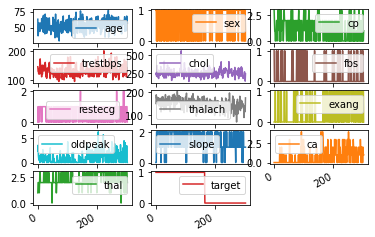

In [13]:
df.plot(subplots=True, layout=(5,3))

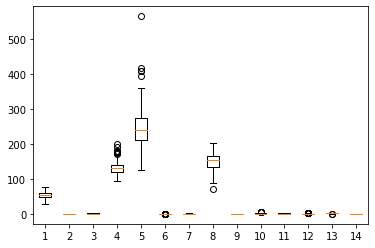

In [14]:
plt.clf
plt.boxplot(df)
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

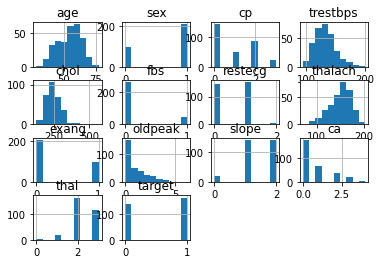

In [15]:
df.hist()

### D. Categorical

In [16]:
# Uniques
import pandas as pd

colNames = df.columns.tolist()
uniqueValsList = []                    

for each in colNames:
    uniqueVals = list(df[each].unique())
    uniqueValsList.append(pd.Series(data=uniqueVals,name=each))

maxlen = 0
for each in uniqueValsList:
    if len(each) > maxlen:
        maxlen = len(each)

fillerData = np.empty((maxlen,len(colNames),))
dfDiff = pd.DataFrame(columns=colNames,data=fillerData)

for i in range(len(uniqueValsList)):
    dfDiff[colNames[i]] = uniqueValsList[i]
dfDiff


# from IPython.display import HTML, display
# import tabulate

# listOfLists = []
# for i in range(len(uniqueValsList)):
#     thisList = []
#     thisList.append(colNames[i])
#     for each in uniqueValsList[i].tolist():
#         thisList.append(each)
#     listOfList.append(thisList)

# display(HTML(tabulate.tabulate(listOfLists, tablefmt='html')))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,0.0,2.0,130.0,250,0.0,1.0,187.0,1.0,3.5,2.0,2.0,2.0,0.0
2,41.0,NaN,1.0,120.0,204,NaN,2.0,172.0,NaN,1.4,1.0,1.0,3.0,NaN
3,56.0,NaN,0.0,140.0,236,NaN,NaN,178.0,NaN,0.8,NaN,3.0,0.0,NaN
4,57.0,NaN,NaN,172.0,354,NaN,NaN,163.0,NaN,0.6,NaN,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,NaN,NaN,NaN,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,NaN,NaN,NaN,NaN,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,NaN,NaN,NaN,NaN,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### E. TARGET DEFINITION

In [17]:
df['target'].unique()

array([1, 0], dtype=int64)

The target column is named target. It has two classes and no missing values.

### F. INITIAL EXPLORATION

age


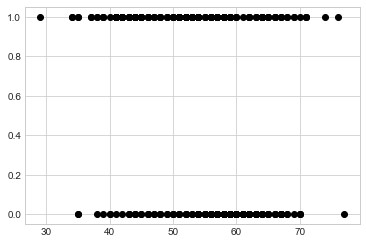

sex


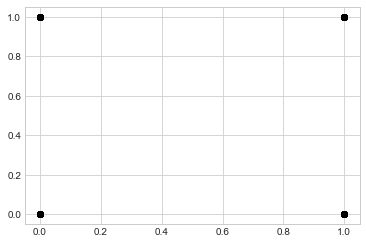

cp


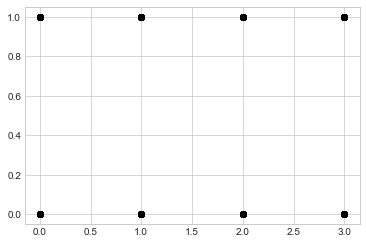

trestbps


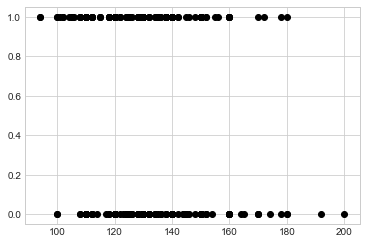

chol


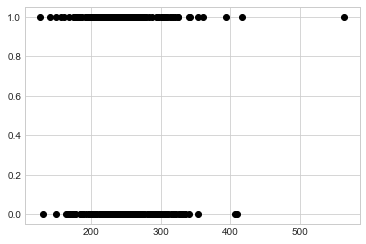

fbs


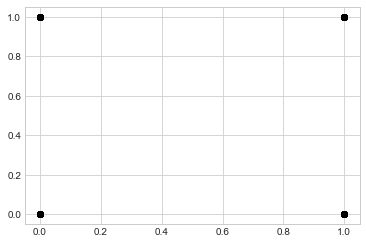

restecg


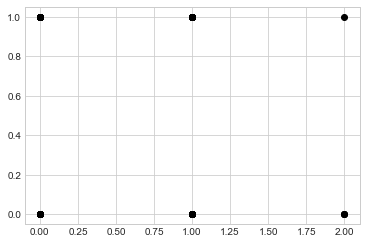

thalach


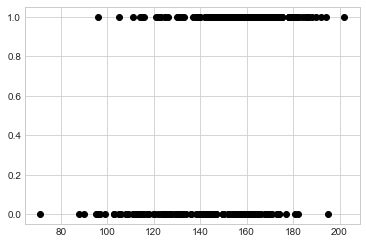

exang


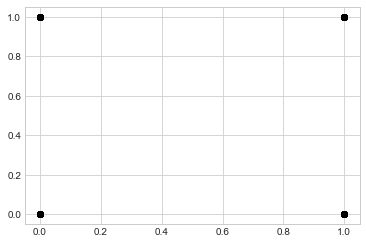

oldpeak


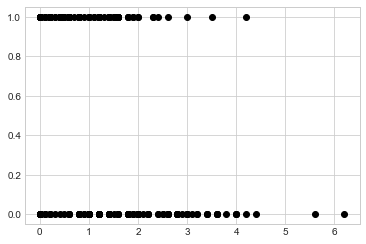

slope


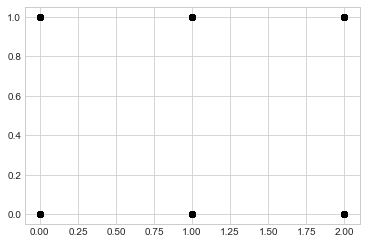

ca


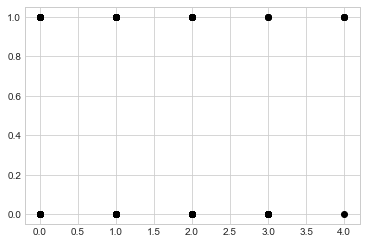

thal


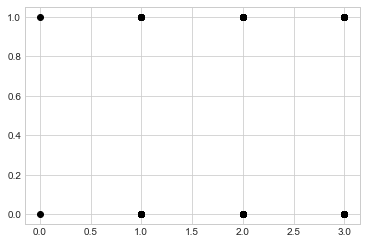

target


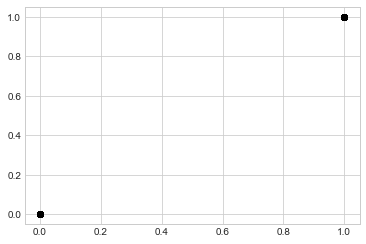

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

for i in df:
    x = df[i]
    y = df['target']

    print(i)
    plt.plot(x, y, 'o', color='black')
    plt.show()